## Retail Giant Sales Forecasting Project

## <span style='font-size:small'>_A Time Series Forecasting project_</span>



### Business Problem Statement & Objective

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories - consumer, corporate and home office.

As a sales manager of this store, we have to identify the most consistently profitable market-segment & forecast the sales of the products for the next 6 months, so that we have a proper estimate and can plan inventory and business processes accordingly.



#### Broadly, following are the steps performed in this project:

1. Importing & Understanding the Data
2. Data Preparation & CoV Analysis _(to identify the most consistently profitable market-segment)_
3. Forecasting Model Building and Evaluation
    - Naive Method
    - Simple Average Method
    - Simple Moving Average Method
    - Simple Exponential Smoothing
    - Holt’s exponential smoothing
    - Holt-Winters’ exponential smoothing - Additive
    - Holt-Winters’ exponential smoothing - Multiplicative
    -------------------------------------------------------
    - Stationarity Tests; Box Cox transformation & Differencing
    -------------------------------------------------------
    - Auto Regression Method (AR)
    - Moving Average method (MA)
    - Auto regression moving average(ARMA) method
    - Auto Regressive Integrated Moving Average (ARIMA) method
    - Seasonal Auto Regressive Integrated Moving Average (SARIMA) method
    - Conclusion



## 1. Importing & Understanding the Data

In [1]:
# importing the required pachages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
gmart = pd.read_csv('Global+Superstore+Data.csv')
gmart['Order Date'] = pd.to_datetime(gmart['Order Date'], format='%d-%m-%Y')
gmart.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07-31,Consumer,US,2309.650,762.1845
1,2013-02-05,Corporate,APAC,3709.395,-288.7650
2,2013-10-17,Consumer,APAC,5175.171,919.9710
3,2013-01-28,Home Office,EU,2892.510,-96.5400
4,2013-11-05,Consumer,Africa,2832.960,311.5200


In [3]:
gmart.shape

(51290, 5)

In [4]:
gmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
Order Date    51290 non-null datetime64[ns]
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Profit        51290 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.0+ MB


So there are no missing values in the dataset. Hence, we are good to proceed with the next steps.

## 2. Data Preparation & CoV Analysis

Lets prepare the data for CoV Analysis & further for the various Forecasting models.

In [5]:
# Deriving another column 'Year-Month' from Order Date for aggregation purpose.
gmart['Year-Month'] = gmart['Order Date'].dt.to_period('M')
gmart.head()

,Order Date,Segment,Market,Sales,Profit,Year-Month
0,2012-07-31,Consumer,US,2309.650,762.1845,2012-07
1,2013-02-05,Corporate,APAC,3709.395,-288.7650,2013-02
2,2013-10-17,Consumer,APAC,5175.171,919.9710,2013-10
3,2013-01-28,Home Office,EU,2892.510,-96.5400,2013-01
4,2013-11-05,Consumer,Africa,2832.960,311.5200,2013-11


In [6]:
# Combining Market & Segment to derive another column -> 'Market-Segment'
gmart['Market-Segments'] = gmart['Market']+'-'+gmart['Segment']
gmart.head()

,Order Date,Segment,Market,Sales,Profit,Year-Month,Market-Segments
0,2012-07-31,Consumer,US,2309.650,762.1845,2012-07,US-Consumer
1,2013-02-05,Corporate,APAC,3709.395,-288.7650,2013-02,APAC-Corporate
2,2013-10-17,Consumer,APAC,5175.171,919.9710,2013-10,APAC-Consumer
3,2013-01-28,Home Office,EU,2892.510,-96.5400,2013-01,EU-Home Office
4,2013-11-05,Consumer,Africa,2832.960,311.5200,2013-11,Africa-Consumer


In [7]:
# Dropping the redundant columns -> 'Market','Segment', 'Order Date'
gmart.drop(['Market','Segment', 'Order Date'],axis=1,inplace=True)
gmart.head()

,Sales,Profit,Year-Month,Market-Segments
0,2309.650,762.1845,2012-07,US-Consumer
1,3709.395,-288.7650,2013-02,APAC-Corporate
2,5175.171,919.9710,2013-10,APAC-Consumer
3,2892.510,-96.5400,2013-01,EU-Home Office
4,2832.960,311.5200,2013-11,Africa-Consumer


In [8]:
gmart['Market-Segments'].value_counts()

APAC-Consumer         5699
LATAM-Consumer        5321
US-Consumer           5191
EU-Consumer           5186
APAC-Corporate        3283
EU-Corporate          3077
LATAM-Corporate       3053
US-Corporate          3020
EMEA-Consumer         2538
Africa-Consumer       2381
APAC-Home Office      2020
LATAM-Home Office     1920
US-Home Office        1783
EU-Home Office        1737
EMEA-Corporate        1574
Africa-Corporate      1312
EMEA-Home Office       917
Africa-Home Office     894
Canada-Consumer        202
Canada-Corporate       110
Canada-Home Office      72
Name: Market-Segments, dtype: int64

In [9]:
# Checking the count of unique values in the 'Market-Segment' column
len(gmart['Market-Segments'].unique())

21

In [10]:
# Aggregating the Profit with Pivot table for 'Market-Segments' & 'Year-Month'
gmartagg = gmart.pivot_table(index = 'Year-Month', columns = 'Market-Segments', values = 'Profit', aggfunc = 'sum')
gmartagg.head()

Market-Segments,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Year-Month,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


#### Splitting the dataset into Train & Test
- Train: 42 months
- Test: 6 months

In [11]:
train_len = 42
train_gmartagg = gmartagg[0: train_len]
test_gmartagg = gmartagg[train_len:]

In [12]:
train_gmartagg.shape

(42, 21)

In [13]:
test_gmartagg.shape

(6, 21)

### CoV Calculation & Analysis

To find the most consistently profitable market-segment we will leverage a measure called "Coefficient of Variation (CoV)". The coefficient of variation or CoV is nothing but the ratio of the standard deviation to mean for the data that it is being calculated for.

As a better metric to compare the variance between the market-segments, using the coefficient of variation will normalise the standard deviation with the mean and gives us a comparative figure on the basis of which we can identify the most profitable market-segment.

In [14]:
cov = pd.DataFrame(columns = ['Marke-segment', 'COV'])
cov.head()

,Marke-segment,COV


In [15]:
for i in train_gmartagg.columns:
    temp_cov = {'Marke-segment': i, 'COV': np.std(train_gmartagg[i])/np.mean(train_gmartagg[i])}
    cov = cov.append(temp_cov, ignore_index = True)

In [16]:
cov.sort_values(by = 'COV')

,Marke-segment,COV
0,APAC-Consumer,0.596404
12,EU-Consumer,0.647485
15,LATAM-Consumer,0.680684
13,EU-Corporate,0.689346
1,APAC-Corporate,0.731926
16,LATAM-Corporate,0.880260
19,US-Corporate,1.027209
2,APAC-Home Office,1.048817
18,US-Consumer,1.095295
14,EU-Home Office,1.114681


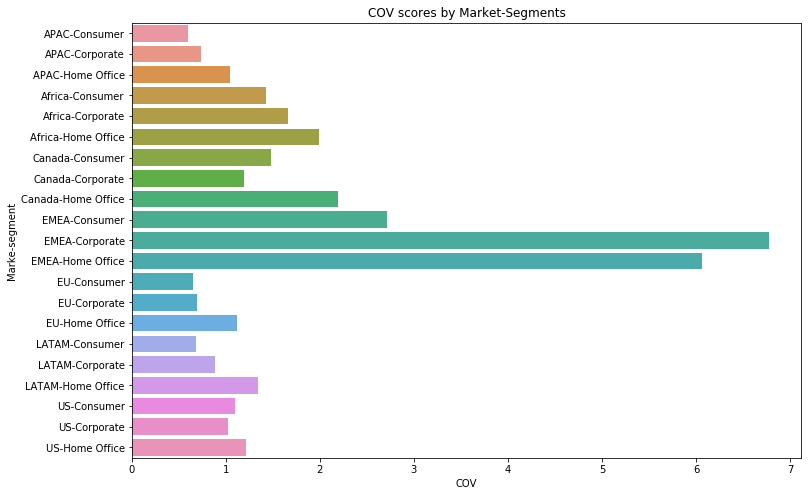

In [94]:
sns.barplot(y="Marke-segment", x="COV", data=cov, orient='h')
plt.title('COV scores by Market-Segments')
plt.show()

**About CoV:** Based on some research around CoV, we understood that: 
- Higher the CoV value, higher is the fluctuation & variation in the dataset.
- Lower the CoV value, lower is the fluctuations & variation in the dataset.

#### So from the above table/plot, we can see that 'APAC-Consumer' has the least CoV value. Therefore, we can conclude that 'APAC-Consumer' is the most profitable market-segment.

Now, lets compare the plot for the Market-Segment with lowest CoV & highest CoV

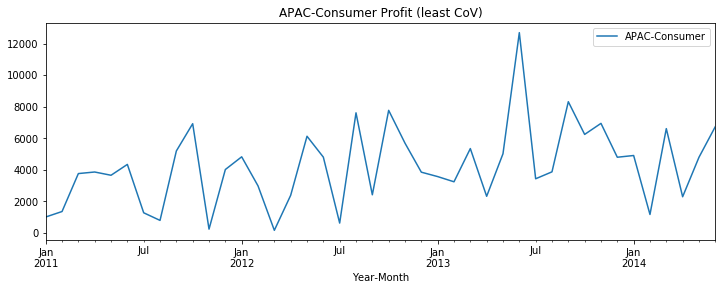

In [17]:
# Profit plot for 'APAC-Consumer'
train_gmartagg['APAC-Consumer'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC-Consumer Profit (least CoV)')
plt.show(block=False)

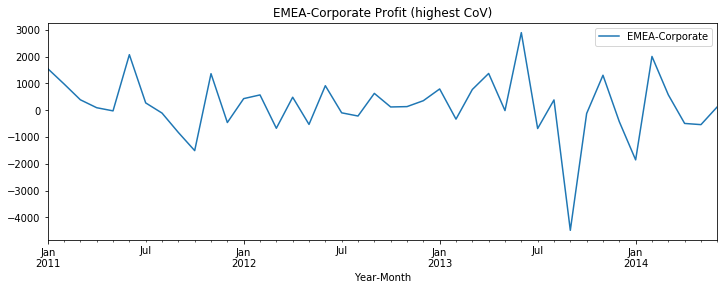

In [18]:
# Profit plot for 'EMEA-Corporate'
train_gmartagg['EMEA-Corporate'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EMEA-Corporate Profit (highest CoV)')
plt.show(block=False)

**Insights:**
- From the above comparison analysis, we can understand that mainly it is because of the Profit mean which is causing the change in CoV of both the market segments.

## 3. Forecasting Model Building and Evaluation

From now on in the model building process, we will be focusing on the most profitable market-segment. i.e. -> 'APAC-Consumer'.

In [19]:
gmart.head()

,Sales,Profit,Year-Month,Market-Segments
0,2309.650,762.1845,2012-07,US-Consumer
1,3709.395,-288.7650,2013-02,APAC-Corporate
2,5175.171,919.9710,2013-10,APAC-Consumer
3,2892.510,-96.5400,2013-01,EU-Home Office
4,2832.960,311.5200,2013-11,Africa-Consumer


In [20]:
# Filtering the entire data for the most profitable market-segment. i.e. -> 'APAC-Consumer'.
gmart1 = gmart[gmart['Market-Segments'] == 'APAC-Consumer']
gmart1.head()

,Sales,Profit,Year-Month,Market-Segments
2,5175.171,919.971,2013-10,APAC-Consumer
6,1822.080,564.840,2011-11,APAC-Consumer
7,5244.840,996.480,2012-04,APAC-Consumer
14,3701.520,1036.080,2013-06,APAC-Consumer
29,1878.720,582.360,2012-02,APAC-Consumer


In [21]:
gmart1.shape

(5699, 4)

In [22]:
# Selecting only the required columns
gmart2 = gmart1[['Year-Month','Sales']]
gmart2.head()

,Year-Month,Sales
2,2013-10,5175.171
6,2011-11,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [23]:
# Aggregating the 'Year-Month' by the sum of Sales
gmart3 = gmart2.groupby(by='Year-Month').sum()
gmart3.head()

,Sales
Year-Month,
2011-01,15711.7125
2011-02,12910.8588
2011-03,19472.5632
2011-04,15440.3046
2011-05,24348.9723


In [24]:
#Formating the index column('Year-Month') to date-time format
gmart3 = gmart3.to_timestamp()

In [25]:
gmart3.shape

(48, 1)

#### Splitting the dataset into Train & Test
- Train: 42 months
- Test: 6 months

In [26]:
train_len = 42
train_gmart = gmart3[0: train_len]
test_gmart = gmart3[train_len:]

In [27]:
train_gmart.shape

(42, 1)

In [28]:
test_gmart.shape

(6, 1)

In [29]:
train_gmart.head()

,Sales
Year-Month,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


In [30]:
test_gmart.head()

,Sales
Year-Month,
2014-07-01,36524.3028
2014-08-01,63521.7729
2014-09-01,44477.2662
2014-10-01,77379.8286
2014-11-01,82286.3583


### Plotting the train set

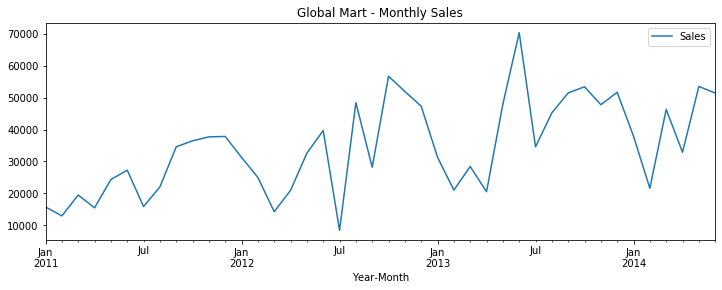

In [31]:
train_gmart.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Global Mart - Monthly Sales')
plt.show(block=False)

Let's decompose the above plot to understand the trend & seasonality of Sales

### Decomposing the above plot

#### Additive seasonal decomposition

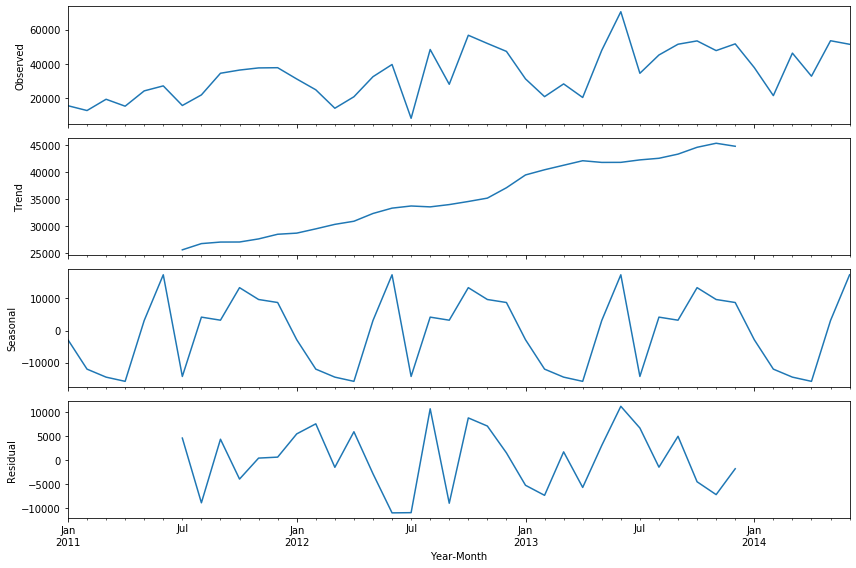

In [32]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train_gmart.Sales, model='additive')
fig = decomposition.plot()
plt.show()

#### Multiplicative seasonal decomposition

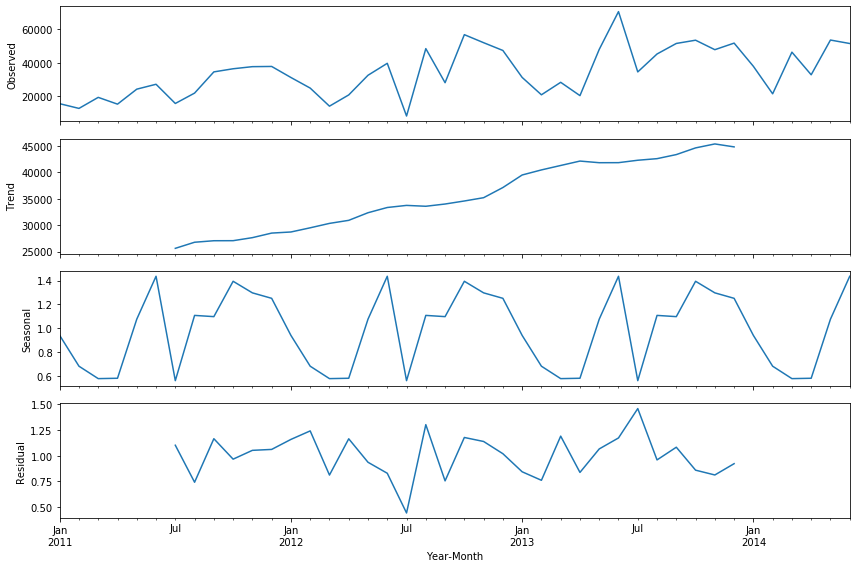

In [33]:
decomposition = sm.tsa.seasonal_decompose(train_gmart.Sales, model='multiplicative')
fig = decomposition.plot()
plt.show()

#### From the above decomposition plots, we can understand that the monthly sales has an upward trend and an annual seasonality which repeats after every 12 months.

Now, with the help of the below model selection flow chart, let's understand what all Smoothing & ARIMA set of forecasting models would be best suited for our dataset.

![image.png](attachment:image.png)

- We have more than 10 observations in out historical(train) dataset, so would go and select models from the bottom half of this flow chart.
- Our dataset has both trend & seasonality. So we are going to select models accordingly from the flow chart.
- From the Exponential Smoothing set of models, the best suited forecasting model would be - "Holt Winters"
- From the ARIMA set of models, the best suited forecasting model would be - "SARIMA".

**Let's begin with building all the Smoothing & ARIMA set of forecasting models to understand if our hypothesis(above-mentioned) on model selection is correct or not.**

### Building and Evaluating various forecasting models

#### Let's start with all the Smoothing techniques of model building

### 1. Naive method

In [34]:
y_hat_naive = test_gmart.copy()
y_hat_naive['naive_forecast'] = train_gmart['Sales'][train_len-1]

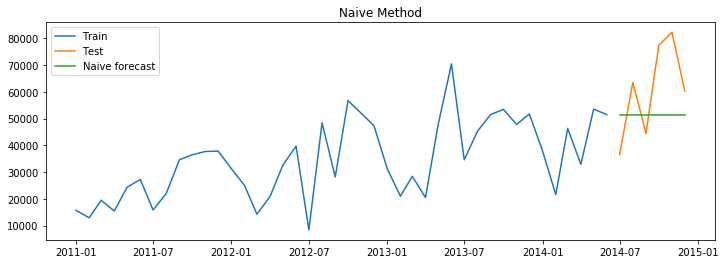

In [35]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [36]:
# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_naive['naive_forecast'])/test_gmart['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


### 2. Simple Average Method

In [37]:
y_hat_avg = test_gmart.copy()
y_hat_avg['avg_forecast'] = train_gmart['Sales'].mean()

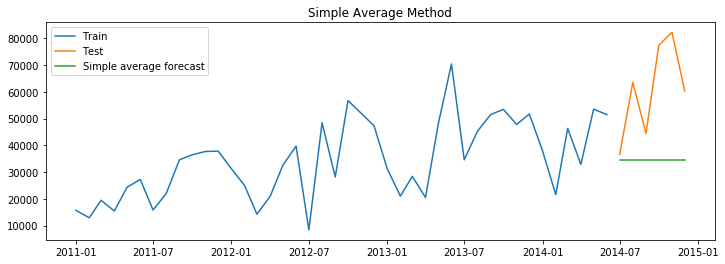

In [38]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [39]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_avg['avg_forecast'])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


### 3. Simple Moving Average Method

In [40]:
y_hat_sma = gmart3.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = gmart3['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

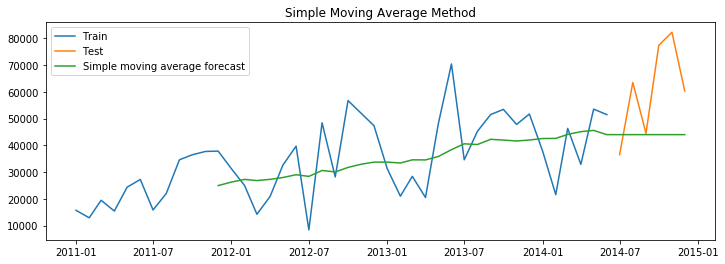

In [41]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [42]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_sma['sma_forecast'][train_len:])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15


### 4. Simple Exponential Smoothing

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_gmart['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test_gmart.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

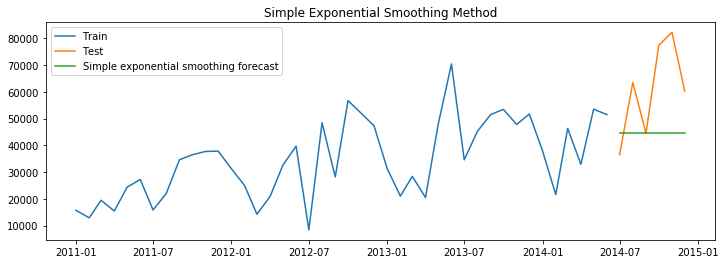

In [44]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [45]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_ses['ses_forecast'])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73


### 5. Holt's Exponential Smoothing Method

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_gmart['Sales']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test_gmart.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_gmart))

{'smoothing_level': 5.0949797475594565e-11, 'smoothing_slope': 4.867791941471747e-12, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 16541.393420583274, 'initial_slope': 807.9151163828058, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


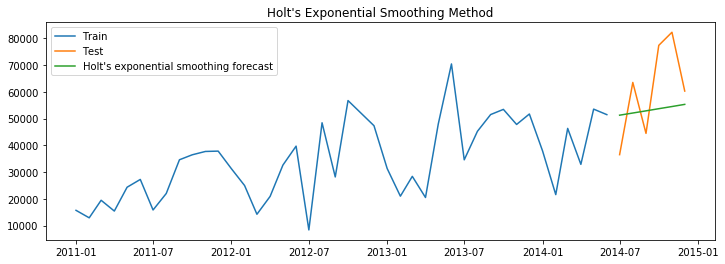

In [47]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [48]:
# Calculate RSME and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_holt['holt_forecast'])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73
0,Holt's exponential smoothing method,17204.15,24.99


### 6. Holt Winters' Additive Method

In [49]:
y_hat_hwa = test_gmart.copy()
model = ExponentialSmoothing(np.asarray(train_gmart['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474944, 'damping_slope': nan, 'initial_level': 29061.291899999593, 'initial_slope': 730.4167145833245, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


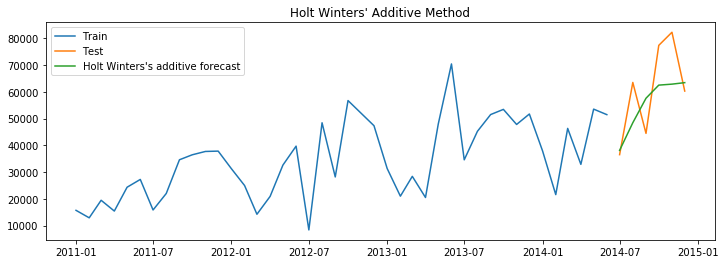

In [50]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [51]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_hwa['hw_forecast'])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61


### 7. Holt Winter's Multiplicative Method

In [52]:
y_hat_hwm = test_gmart.copy()
model = ExponentialSmoothing(np.asarray(train_gmart['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.291900000004, 'initial_slope': 730.4167145833347, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


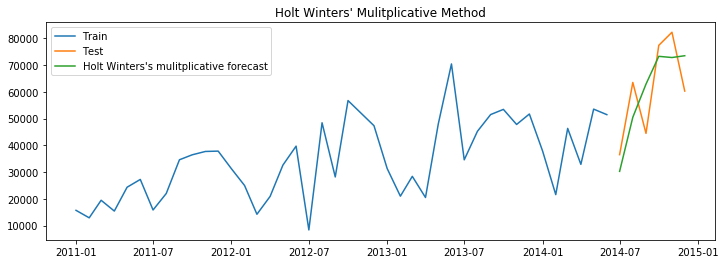

In [53]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [54]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_hwm['hw_forecast'])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62


#### Insights:
- Of all the Smoothing techniques, we can conclude that **Holt Winters' multiplicative method** has performed the best with the least RMSE & MAPE scores.
- This model is the same as what we had found out initially with the help of model selection flow chart.

#### Let's move onto the Auto Regressive set of methods for forecasting

### Stationarity Tests

Before we begin with the Auto Regressive model building, lets check if the dataset is sationary or not. If not, lets perform the Box-Cox Tranformation & Differencing techniques to make the dataset stationary.

**Augmented Dickey-Fuller (ADF) test**

In [55]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(gmart3['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test**

In [56]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(gmart3['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


From both the above ADF & KPSS tests, looking at the p-values & their respective Null & Alternate Hypothesis, we can conclude that the our dataset is a Non-Stationary dataset.

### Box Cox transformation to make variance constant

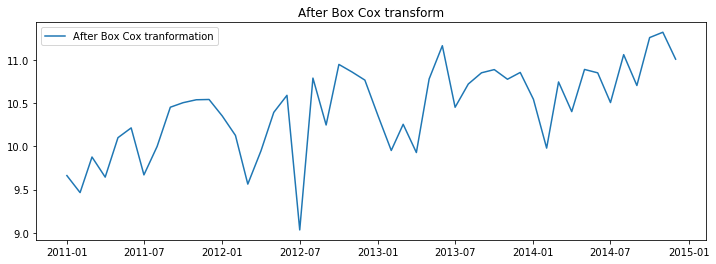

In [57]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(gmart3['Sales'], lmbda=0), index = gmart3.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

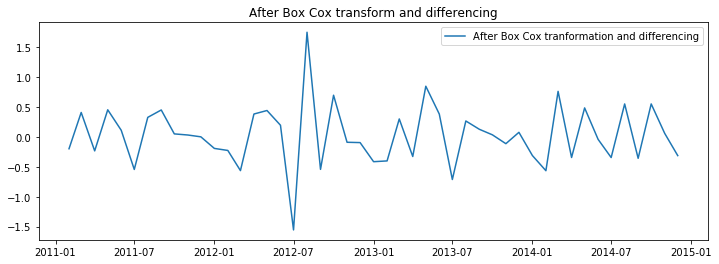

In [58]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), gmart3.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [59]:
data_boxcox_diff.describe()

count    47.000000
mean      0.028613
std       0.520354
min      -1.554595
25%      -0.318529
50%       0.033713
75%       0.384409
max       1.753416
dtype: float64

In [60]:
data_boxcox_diff.dropna(inplace=True)

In [61]:
data_boxcox_diff.shape

(47,)

#### Now performing the Stationarity test again

#### Augmented Dickey-Fuller (ADF) test

In [62]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [63]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


So, now from the above observations, we can conclude that the dataset we have obtained after the two types of tranformations is now a Stationary data.

#### Let's perform the Train & Test split again

In [64]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [65]:
test_data_boxcox_diff

Year-Month
2014-07-01   -0.343287
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
Freq: MS, dtype: float64

Let's begin with all the Auto Regressive set of methods for forecasting

### 8. Auto Regression Method (AR)

In [66]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


In [67]:
# Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

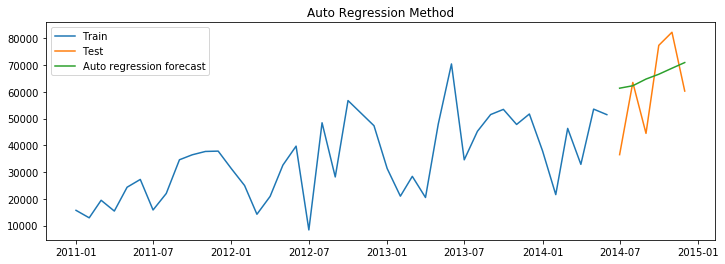

In [68]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_gmart.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [69]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_ar['ar_forecast'][test_gmart.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_ar['ar_forecast'][test_gmart.index.min():])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27


### 9. Moving Average method (MA)

In [70]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


In [71]:
# Recover original time series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

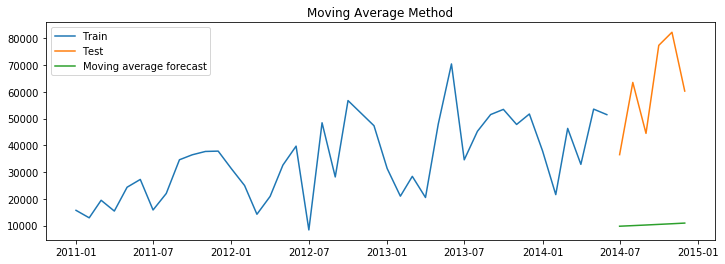

In [72]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(gmart3['Sales'][:train_len], label='Train')
plt.plot(gmart3['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_gmart.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [73]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_ma['ma_forecast'][test_gmart.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_ma['ma_forecast'][test_gmart.index.min():])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64


### 10. Auto regression moving average(ARMA) method 

In [74]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999969
dtype: float64


In [75]:
# Recover original time series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

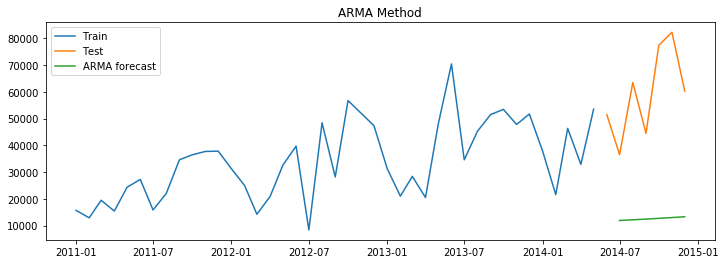

In [76]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(gmart3['Sales'][:train_len-1], label='Train')
plt.plot(gmart3['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_gmart.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [77]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


### 11. Auto Regressive Integrated Moving Average (ARIMA) method

In [78]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999969
dtype: float64


In [79]:
# Recover original time series forecast
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

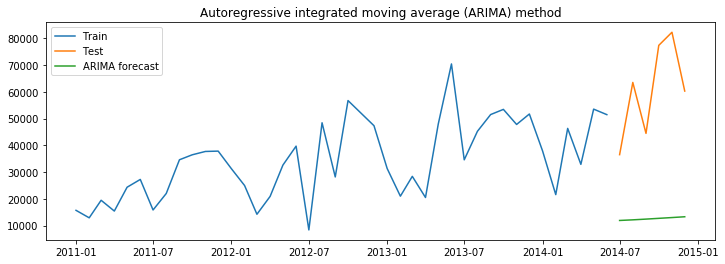

In [80]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_gmart.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [81]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_arima['arima_forecast'][test_gmart.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_arima['arima_forecast'][test_gmart.index.min():])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


### 12. Seasonal Auto Regressive Integrated Moving Average (SARIMA) method

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.047440
ma.L1      -0.844716
ar.S.L12    0.999195
ma.S.L12   -0.950492
sigma2      0.078659
dtype: float64


In [83]:
# Recover original time series forecast
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

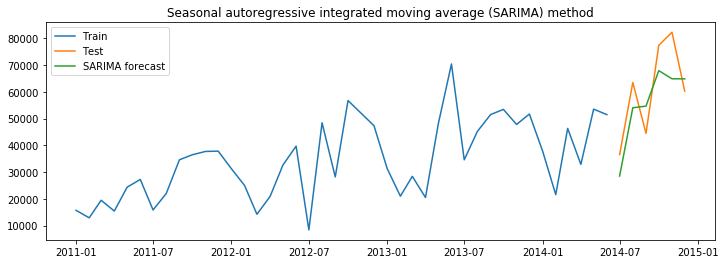

In [84]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_gmart['Sales'], label='Train')
plt.plot(test_gmart['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_gmart.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [85]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_gmart['Sales'], y_hat_sarima['sarima_forecast'][test_gmart.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_gmart['Sales']-y_hat_sarima['sarima_forecast'][test_gmart.index.min():])/test_gmart['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,22991.87,27.73
0,Holt's exponential smoothing method,17204.15,24.99
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


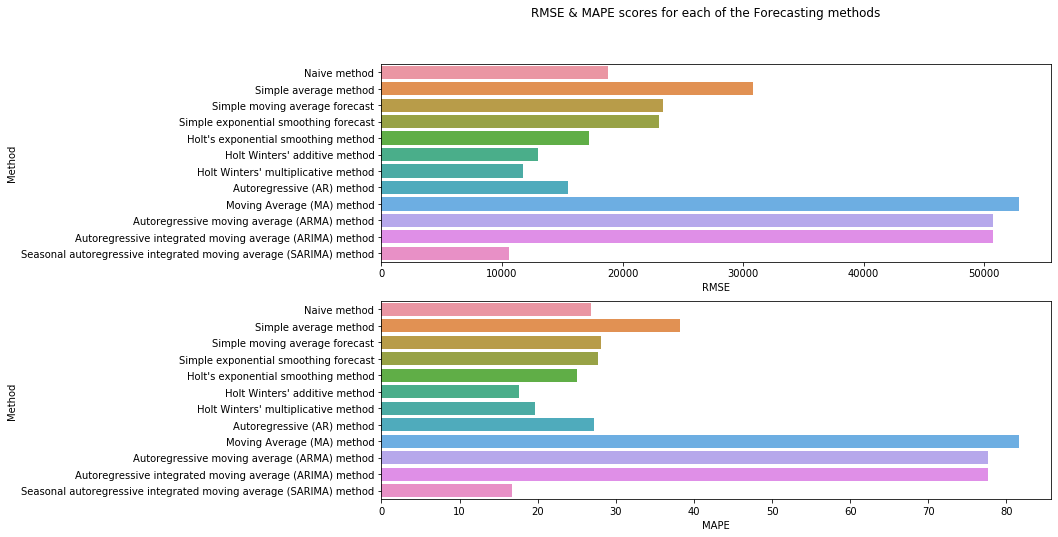

In [104]:
# Plotting RMSE & MAPE scores for each of the forecastimg methods
plt.subplot(2,1,1)
sns.barplot(y="Method", x="RMSE", data=results, orient='h')

plt.subplot(2,1,2)
sns.barplot(y="Method", x="MAPE", data=results, orient='h')

plt.suptitle("RMSE & MAPE scores for each of the Forecasting methods")
plt.show()

#### Insights & Conclusion:    
- Of all the Auto Regressive forecasting techniques, we can conclude that **Seasonal Auto Regressive Integrated Moving Average (SARIMA)** method has performed the best with the least RMSE & MAPE scores. 
- This model is the same as what we had found out initially with the help of model selection flow chart.
- Overall, comparing all the above **12 models(Smoothing & Auto Regressive)** that we have built & evaluated so far & looking at their respective RMSE & MAPE scores, we can conclude that **Seasonal Auto Regressive Integrated Moving Average (SARIMA)** has performed the best in forcasting the future Sales.

## Thank You!

```

```

